<a href="https://colab.research.google.com/github/allensheneka/predict-sales/blob/main/Predict_Sales_pt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict Sales - Part 3

Sheneka Allen

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = ('/content/drive/MyDrive/Data Science/sales_predictions.csv')
predict_sales_df = pd.read_csv(filename)
predict_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
predict_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


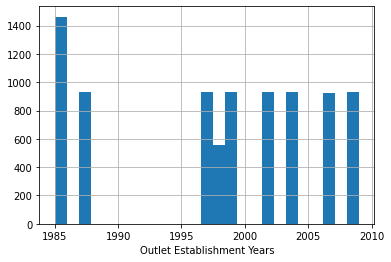

In [6]:
# histogram of outlet openings each year
predict_sales_df["Outlet_Establishment_Year"].hist(bins=25)
plt.xlabel("Outlet Establishment Years");

Histogram Analysis:  This data shows that the majority of the Outlets were established between ~1997 to 2009; 1997-1999; 2002 & 2004; 2007 & 2009.  Early years, Outlets were established in years 1986 & 1988 with about a 7yr break from opening Outlets between 1989-1996.

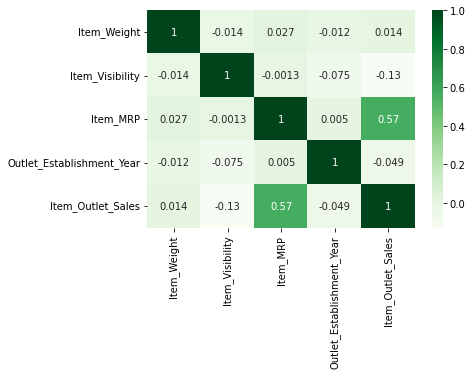

In [7]:
# correlation and heatmap to determine IF there are any dataset relationships
corr = predict_sales_df.corr()

# add correlation coefficients to heatmap with annot = True
sns.heatmap(corr, cmap = 'Greens', annot = True);

Heatmap Analysis:  The Item_MRP and Item_Outlet_Sales data show a 'moderate' correlation relationship with 0.57 coefficient.  With majority of values less than 0.3, few dataset variables show any relationships.

In [8]:
predict_sales_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


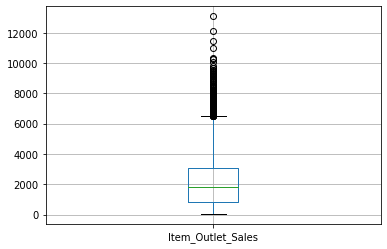

In [15]:
# Boxplots of Item Outlet Sales
predict_sales_df.boxplot(column=["Item_Outlet_Sales"]);

# boxplot shows that majority of sales are in 75% quartile (2000-5000); 25% of data is less than 2000
# demonstrating that data overall is somewhat skewed, significant data outliers.  Max sales is 7000.